In [1]:
#Import Libraries

In [6]:
import pygmt
import pandas as pd
import numpy as np
import obspy
# from obspy.imaging.beachball import beachball
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
# Define Paths
# g2t_stn_list4plot='/Users/banjo/Projects/nll_pnsn/util/stationInfo/g2t_evid_61536022_stnInfo4plot.out'
# g2t_stn_list4plot='/Users/banjo/Projects/nll_pnsn/util/stationInfo/61535372_stations.csv'
g2t_stn_list4plot='/Users/banjo/Projects/nll_pnsn/util/stationInfo/gtsrce.list'

cat = pd.read_csv("/Users/banjo/Projects/nll_pnsn/util/catalogs/pnsn.cat")
# cat = pd.read_csv("/Users/banjo/Projects/nll_pnsn/util/catalogs/brem_reloc.cat")

polygon = pd.read_csv('/Users/banjo/Projects/nll_pnsn/figures/miscFiles/p4_boundaries.txt')
pnsn_region=pd.read_csv('/Users/banjo/Projects/nll_pnsn/figures/miscFiles/pnsn_region.txt', sep = ' ')

In [80]:
#Approximation of where the CVM stops inland
cvmx1 = -122.0
cvmx2 = -122.0
cvmy1 = 49.5
cvmy2 = 41.0

In [75]:
# PNSN Velocity Model Boundaries:

#Saint Helens
sx= [46.0,46.0,  46.5,  46.5,  46.0] 
sy=[-121.8, -122.5, -122.5, -121.8, -121.8]

#Cascades

cx =  [45.5 , 46 , 46.2  ,46.6  ,47  ,47.4 , 48  ,49  ,49.5  ,49.5  ,47.5 ,47.0  ,46.5  ,45.5  ,45.5 ]
cy =  [-123.0 ,-123 ,-123.0 ,-122.533, -122.067, -121.6, -121.7, -121.8, -121.6,
       -120.0, -120.56, -120.7, -120.7, -120.7, -123 ]

#Puget Sound

px=[49.5,49,48,47.4,47,46.6,46.2,46,45.5,45.5,49.5,49.5]
py=[-121.6,-121.8,-121.7,-121.6,-122.067,-122.533,-123.0,-123,-123.0,-125.0,-125.0,-121.6]

#N.Washington

nx=[49.5,49.5,49.5,47.0,47,47,47.0,47.5,49.5]
ny=[-120.0,-119,-116.8,-116.8,-119,-120,-120.7,-120.56,-120.0]


#E.Washington

ex =[ 45.5 , 46.5 ,47.0  ,47  ,  47,  47.0,  45.5,45.5,45.5, 45.5  ]
ey =[-120.7,-120.7,-120.7,-120,-119,-117.0,-117.0,-119,-120,-120.7]


#Oregon

ox=[43.0,45.5,45.5,43.0,43.0]
oy=[-125.0,-125.0,-117.0,-117.0,-125.0]


#Klakamas

kx=[42.0,43.0,43.0,42.0,42.0]
ky=[-125.0,-125.0,-117.0,-117.0,-125.0]



#jx=[53.0,-133.0,50,-126,49.5,-125.0,38.0,-125.0,38.0,-133.0,53.0,-133.0
#jy=[53.0,-133.0,50,-126,49.5,-125.0,38.0,-125.0,38.0,-133.0,53.0,-133.0


#rx=[53.0,-133.0,58.0,-133.0,58.0,-105.0,30.0,-105.0,30.0,-117.0,38.0,-125.0,42.0,-125.0,42.0,-117.0,49.5,-117.0,49.5,-125.0,50,-126,53.0,
#ry=[53.0,-133.0,58.0,-133.0,58.0,-105.0,30.0,-105.0,30.0,-117.0,38.0,-125.0,42.0,-125.0,42.0,-117.0,49.5,-117.0,49.5,-125.0,50,-126,53.0,

In [ ]:
x=555 
y=1642
xNum = x*(0.5)
yNum = y*(0.5)

swCorner=[41.798,-125.010]

In [4]:
# min_utme=330300,
# max_utme=643500,  
# min_utmn=4632200, 
# max_utmn=5467300,

# 41.82981615191645, -125.04359588182355

minLat = 41.82981615191645
# minLon = -125.04459881434589
minLon = -125.04359588182355
# maxLat = 49.34152785145217
maxLat = 49.251629761299085
maxLon = -121.02447622979743



cvm_bound = 
[[minLat,minLon],[minLat,maxLon],[maxLat,maxLon],[maxLat,minLon],[minLat,minLon]]
cvm_bound = pd.DataFrame(cvm_bound, columns = ['lat','lon'])
cvm_bound

,lat,lon
0,41.829816,-125.043596
1,41.829816,-121.024476
2,49.251630,-121.024476
3,49.251630,-125.043596
4,41.829816,-125.043596


In [5]:
minLat = 46.90009686963806
minLon = -123.69977768915656
maxLat = 48.00007493101957
maxLon = -122.10047685705459
pl_bound = [[minLat,minLon],[minLat,maxLon],[maxLat,maxLon],[maxLat,minLon],[minLat,minLon]]
pl_bound = pd.DataFrame(pl_bound, columns = ['lat','lon'])
pl_bound

,lat,lon
0,46.900097,-123.699778
1,46.900097,-122.100477
2,48.000075,-122.100477
3,48.000075,-123.699778
4,46.900097,-123.699778


In [4]:
fig=pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="plain")
pygmt.config(FORMAT_GEO_MAP="ddd.xx")

r = [-125.0, -121.4, 41.7, 49.70]
# topo_data = '@earth_relief_30s' #30 arc second global relief (SRTM15+V2.1 @ 1.0 km)
# # # colormap = "geo"
# colormap = "gray"


# load the default grid (pixel-registered 01d grid)
# grid = pygmt.datasets.load_earth_relief()
# load the 30m grid with "gridline" registration
# grid = load_earth_relief("30m", registration="gridline")
# load high-resolution grid for a specific region
grid = pygmt.datasets.load_earth_relief(
    "30s", region=r, registration="gridline"
)






# pygmt.makecpt(
#     cmap='elevation',
#     series='-3000/3000/1000',
#     continuous=True)

# fig.grdimage(
#     grid=topo_data,
#     region=r,
#     projection='M6i',
#     shading = True,
#     cmap=colormap,
#     )

# fig.show()
# fig.savefig('/Users/banjo/Projects/nll_pnsn/figures/pnsnRegionDivision1.png')

grdblend [NOTICE]: Remote data courtesy of GMT data server OCEANIA [https://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: Earth Relief at 30x30 arc seconds from Gaussian Cartesian filtering (1.0 km fullwidth) of SRTM15+V2.1 [Tozer et al., 2019].
grdblend [NOTICE]:   -> Download 15x15 degree grid tile (earth_relief_30s_g): N30W135


In [21]:
grid.to_netcdf('/Users/banjo/Projects/nll_pnsn/velocityModels/NetCDF-Files/cvm_topo.nc')

In [10]:
df = grid.to_dataframe()

In [18]:
edf =df.set_index(['lat','lon'])

In [11]:
# df = df.reset_index()

In [19]:
grd = edf.to_xarray()

In [20]:
grd

<xarray.Dataset>
Dimensions:    (lat: 961, lon: 433)
Coordinates:
  * lat        (lat) float64 41.7 41.71 41.72 41.73 ... 49.68 49.68 49.69 49.7
  * lon        (lon) float64 -125.0 -125.0 -125.0 ... -121.4 -121.4 -121.4
Data variables:
    elevation  (lat, lon) float32 -886.5 -880.0 -898.5 ... 140.0 197.0 329.0

In [ ]:
# load the default grid (pixel-registered 01d grid)
grid = load_earth_relief()
# load the 30m grid with "gridline" registration
grid = load_earth_relief("30m", registration="gridline")
# load high-resolution grid for a specific region
grid = load_earth_relief(
    "05m", region=[120, 160, 30, 60], registration="gridline"
)

In [4]:
topo_data = '@earth_relief_30s'

NameError: name 'grid' is not defined

grdblend [WARNING]: File @N30W135.earth_relief_30s_p.nc not supported via row-by-row read - must reformat first
grdconvert [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdconvert [WARNING]: e reset from -120.004166667 to -120
grdconvert [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdconvert [WARNING]: n reset from 44.9958333333 to 45
grdblend [WARNING]: File @N30W120.earth_relief_30s_p.nc not supported via row-by-row read - must reformat first
grdconvert [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdconvert [WARNING]: w reset from -119.995833333 to -120
grdconvert [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdconvert [WARNING]: n reset from 44.9958333333 to 45
grdblend [WARNING]: File @N45W135.earth_relief_30s_p.nc not supported via row-by-row read - must reformat firs

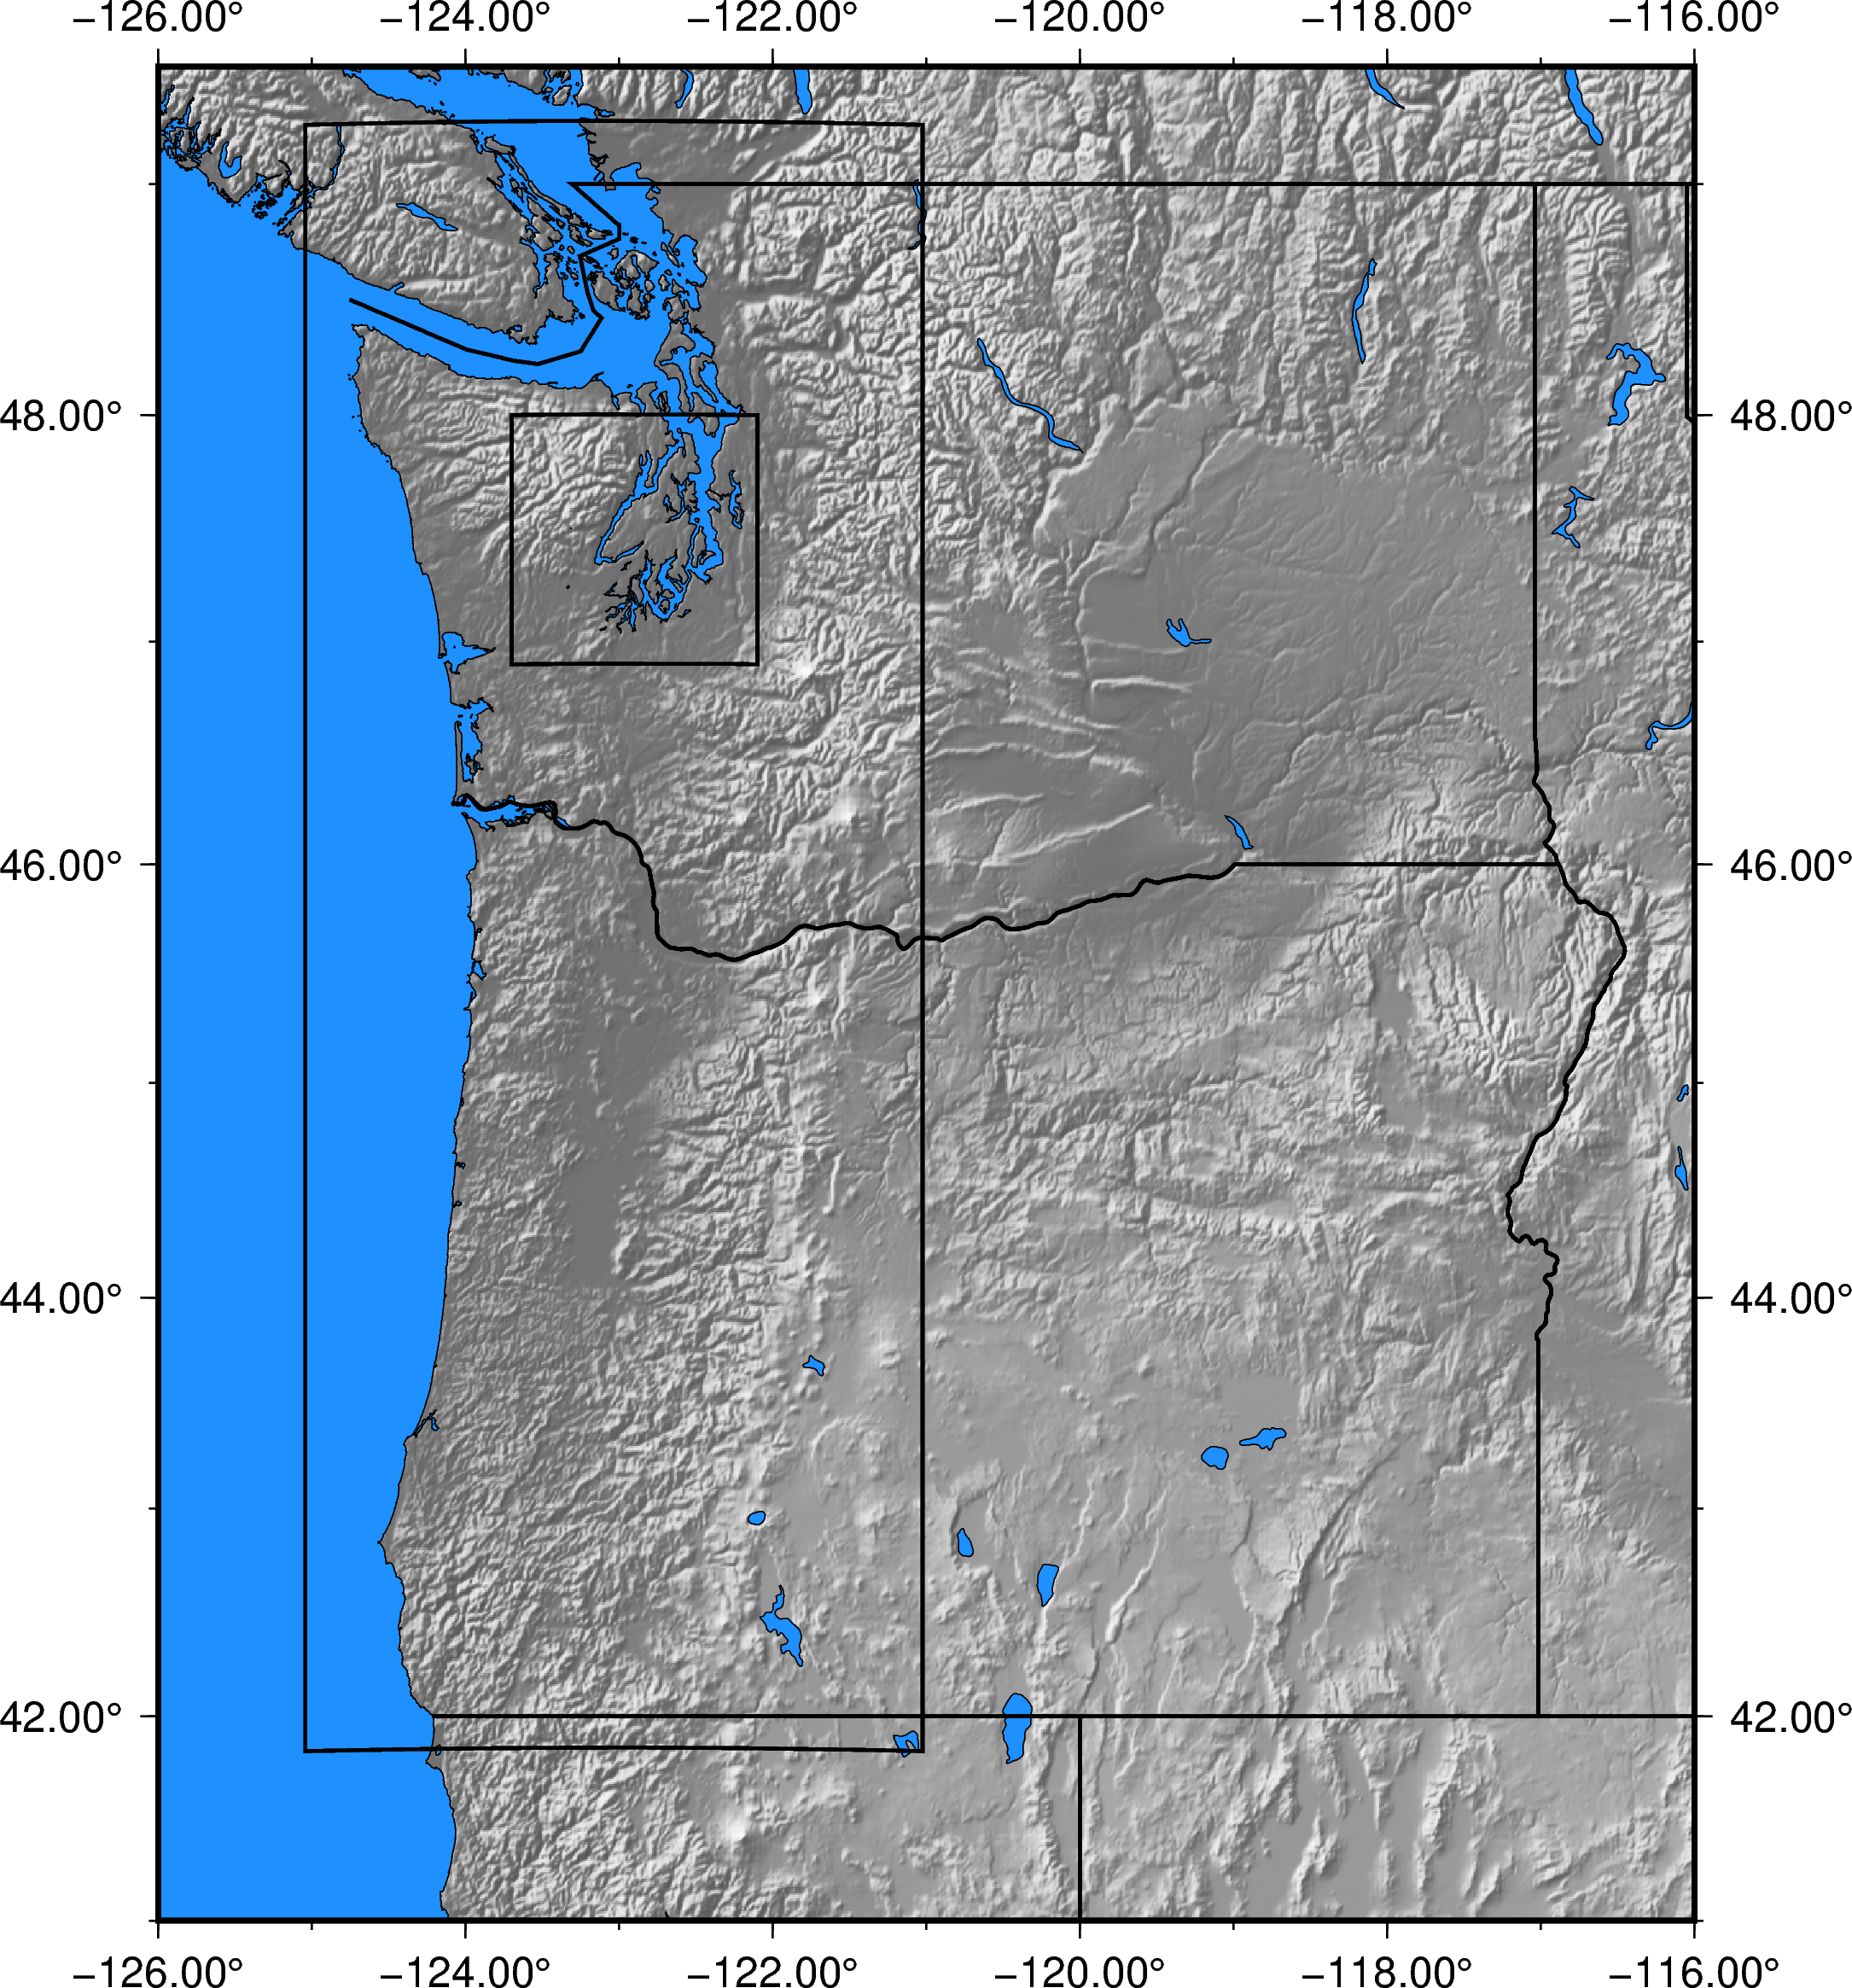

In [7]:
fig=pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="plain")
pygmt.config(FORMAT_GEO_MAP="ddd.xx")

r = [-126.0, -116.0, 41.0, 49.50]
topo_data = '@earth_relief_30s' #30 arc second global relief (SRTM15+V2.1 @ 1.0 km)
# # colormap = "geo"
colormap = "gray"

pygmt.makecpt(
    cmap='elevation',
    series='-3000/3000/1000',
    continuous=True)

fig.grdimage(
    grid=topo_data,
    region=r,
    projection='M6i',
    shading = True,
    cmap=colormap,
    )
# fig.basemap(region=r, projection="M6i", frame=True)

fig.coast(
    region=r,
#     region=[-122.5, -121.4, 47.5, 48.5],
#     region=[-125.5, -121.4, 45.0, 49.6],
#     region=[-124.0, -120.4, 46.5, 49.0],
    projection="M6i",
#     land="navajowhite",
#     land="white",
    water="dodgerblue",
    shorelines=True,
    resolution="f",
    frame=True,borders="a/1p,black"
)



fig.plot(cvm_bound['lon'],cvm_bound['lat'],pen ="1.0p,black")
fig.plot(pl_bound['lon'],pl_bound['lat'],pen ="1.0p,black")



# fig.plot(-polygon['Lat'],polygon['Lon'],pen ="1.0p,black")
# fig.plot(pnsn_region['Lon'],pnsn_region['Lat'],pen ="1.0p,yellow")

#Eastern Boundary of the CVM
# fig.plot([cvmx1,cvmx2],[cvmy1,cvmy2],pen ="3.0p,navy")

# PNSN Authoritative Region. P4
# fig.plot(-polygon['Lat'],polygon['Lon'],pen ="3.0p,red")


#PNSN REgions COlor Filled. 
# fig.plot(pnsn_region['Lon'],pnsn_region['Lat'],color='yellow',pen ="1.0p,black")
# fig.plot(cy,cx,color='brown',pen ="1.0p,black")
# fig.plot(ny,nx,color='orange',pen ="1.0p,black")
# fig.plot(ey,ex,color='cyan',pen ="1.0p,black")
# fig.plot(oy,kx,color='green',pen ="1.0p,black")
# fig.plot(oy,ox,color='magenta',pen ="1.0p,black")
# fig.plot(sy,sx,color='pink',pen ="1.0p,black")
# fig.plot([cvmx1,cvmx2],[cvmy1,cvmy2],pen ="3.0p,red")

# # PNSN Regions No Color Fill 
# fig.plot(pnsn_region['Lon'],pnsn_region['Lat'],pen ="3.0p,red")
# fig.plot(sy,sx,pen ="1.0p,yellow")
# fig.plot(cy,cx,pen ="1.0p,yellow")
# fig.plot(ny,nx,pen ="1.0p,yellow")
# fig.plot(ey,ex,pen ="1.0p,yellow")
# fig.plot(oy,kx,pen ="1.0p,yellow")
# fig.plot(oy,ox,pen ="1.0p,yellow")
# fig.plot(py,px,pen ="1.0p,yellow")


# fig.plot(
#     x = stns['lon'].values,
#     y = stns['lat'].values,
#     sizes=0.5 * 2 ** stns.lon,
#     cmap = False,
#     style = 't0.2c',
#     color = 'red',
# #     label = stns['Station'],
#     pen = 'black')

# fig.plot(cat.Lon,cat.Lat,
# #     sizes=0.1 * 2 ** cat['Mag'].values,
# #     cmap = False,
#     style = 'c0.01c',
#     color = 'purple',
#     pen = 'black')


# #Approximation of where We could stio the CVM stops inland
# pbx1=-122.0
# pbx2 = -120.0
# pby1 = 49
# pby2 = 42
# fig.plot([pbx2,pbx1],[pby1,pby2],pen ="3.0p,black")

# fig.coast(
#     region=r,
#     projection="M6i",
#     shorelines=True,
#     resolution="f",
#     frame=True,borders="a/1p,black")

# fig.colorbar(
#     frame='+l"Elevation"'
#     )

fig.show()
# fig.savefig('/Users/banjo/Projects/nll_pnsn/figures/pnsnRegionDivision1.png')